<h1>Getting Similarity Values</h1>

C Santos

The goal of this notebook is to compare simiarity of top 100 songs of each year (grouped by year or decade) to the top 100 billboard songs.

In [1]:
%%capture
# Get corpus from previous script
from NGRAMS import corpus_raw

In [2]:
import pandas as pd
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import STOPWORDS

In [3]:
# Years are 1965 to 2015
more_songs = pd.read_csv("billboard_lyrics_1964-2015.csv")

In [4]:
def unicoerce(text):
    """
    Returns the result of destroying the f**k out of frustrating
    non-ascii characters that do not allow me to TfidfVectorize
    """
    return ''.join([i if ord(i) < 128 else ' ' for i in text]).encode('utf-8')

In [5]:
# Put together lists of lyrics based on decade into a single string for each decade
lyrics_1960s = unicoerce(" ".join((str(song) for song in more_songs["Lyrics"][:500])))
lyrics_1970s = unicoerce(" ".join((str(song) for song in more_songs["Lyrics"][500:1500])))
lyrics_1980s = unicoerce(" ".join((str(song) for song in more_songs["Lyrics"][1500:2500])))
lyrics_1990s = unicoerce(" ".join((str(song) for song in more_songs["Lyrics"][2500:3500])))
lyrics_2000s = unicoerce(" ".join((str(song) for song in more_songs["Lyrics"][3500:4500])))
lyrics_2010s = unicoerce(" ".join((str(song) for song in more_songs["Lyrics"][-600:])))

In [6]:
from collections import defaultdict

def rm_stop_unique(text):
    """Removes single-occurance tokens and stopwords from text."""
    frequency = defaultdict(int)
    tokens = word_tokenize(text)
    for word in tokens:
        frequency[word] += 1
    my_words = (word for word in tokens if frequency[word] > 1)
    return " ".join([word for word in my_words if word not in STOPWORDS])

In [7]:
# Tokenize raw corpus to get rid of punctuation
corpus = rm_stop_unique(" ".join(word_tokenize(corpus_raw)))

In [8]:
def get_similarity(lyrics):
    """Returns similarity of decadal lyrics to top 100 corpus"""
    tfidf = TfidfVectorizer().fit_transform([rm_stop_unique(corpus), rm_stop_unique(lyrics)])
    return (tfidf * tfidf.T).A[1][0]

In [9]:
# Form generator of lists to iterate over in the following step
decadal_lyrics_list = (lyrics_1960s, lyrics_1970s, lyrics_1980s, lyrics_1990s, lyrics_2000s, lyrics_2010s)

In [10]:
# Get list of similarities for each decade
decadal_similarities = [get_similarity(lyrics) for lyrics in decadal_lyrics_list]

In [11]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [12]:
# Generator for all lyrics
lyrics = [unicoerce(str(song)) for song in more_songs["Lyrics"].copy()]

In [13]:
# List of 51 containg a list of 100 songs 
lyrics_chunked = list(chunks(lyrics, 100))
annual_lyrics_list = [" ".join(year) for year in lyrics_chunked]

In [14]:
# Get list of similarities for each year
annual_similarities = [get_similarity(lyrics) for lyrics in annual_lyrics_list]

<h1>Visualization</h1>

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

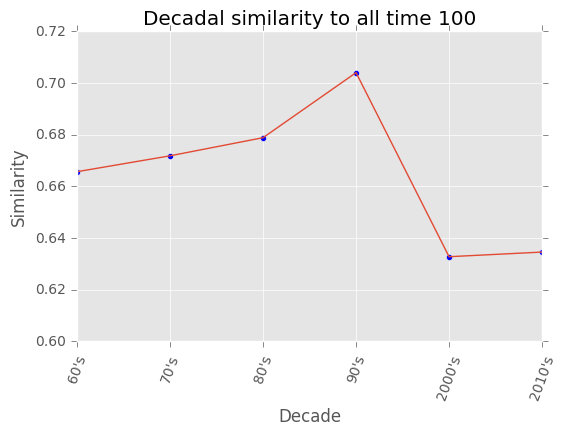

In [16]:
plt.scatter(range(6),decadal_similarities)
plt.plot(range(6), decadal_similarities)
plt.xlim([0,5])
plt.xticks(range(6), ["60's","70's","80's","90's","2000's","2010's"])
plt.xticks(rotation = 70)
plt.xlabel("Decade")
plt.ylabel("Similarity")
plt.title("Decadal similarity to all time 100")
plt.show()

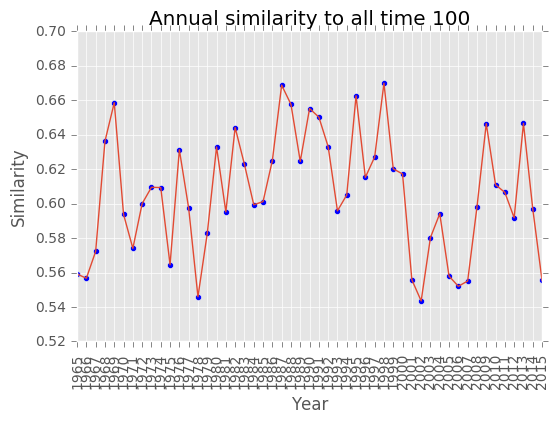

In [17]:
plt.scatter(range(51),annual_similarities)
plt.plot(range(51), annual_similarities)
plt.xlim([0,50])
plt.xticks(range(51), range(1965,2016))
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Similarity")
plt.title("Annual similarity to all time 100")
plt.show()